# Data

The data used here came from UCI Repository and can be find on the this -> [link](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/) <-

# Encoding Categorical Variables

I'll be consulting the `Python Feature Engineering Cookbook`, specifically the cap 03 for this notebook

In [1]:
# libs
import random
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../../data/crx.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
# treat the name columns
varnames = ["A" + str(s) for s in range(1, 17)]
data.columns = varnames
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [4]:
data.value_counts()

A1  A2     A3      A4  A5  A6  A7  A8     A9  A10  A11  A12  A13  A14    A15   A16
?   20.08  0.125   u   g   q   v   1.000  f   t    1    f    g    00240  768   +      1
b   30.17  6.500   u   g   cc  v   3.125  t   t    8    f    g    00330  1200  +      1
    29.67  1.415   u   g   w   h   0.750  t   t    1    f    g    00240  100   +      1
    29.83  1.250   y   p   k   v   0.250  f   f    0    f    g    00224  0     -      1
           2.040   y   p   x   h   0.040  f   f    0    f    g    00128  1     -      1
                                                                                     ..
    16.50  0.125   u   g   c   v   0.165  f   f    0    f    g    00132  0     -      1
    16.92  0.335   y   p   k   v   0.290  f   f    0    f    s    00200  0     -      1
    17.08  0.085   y   p   c   v   0.040  f   f    0    f    g    00140  722   -      1
           0.250   u   g   q   v   0.335  f   t    4    f    g    00160  8     -      1
    ?      10.500  u   g   x   v   6.

In [5]:
# some columns have question mark to indicate missing values
data = data.replace("?", np.nan)

# re-cast numerical variables to float types
data['A2'] = data["A2"].astype('float')
data["A14"] = data["A14"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
# our target variable is in the last column and is composed as + and -
# we will change that to 1 and 0
data["A16"] = data["A16"].replace({"+": 1, "-": 0})

In [7]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [8]:
# selecting categorical and numerical variables
cat_cols = [c for c in data.columns if data[c].dtype == "O"]
num_cols = [c for c in data.columns if data[c].dtype != "O"]

In [9]:
# filling the missing values (simpler technique)
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna("Missing")

In [10]:
# prepared data
data.to_csv("../../data/creditApprovalUCI.csv", index=False)

## Creating binary variables through one-hot-encoding

In one-hot-encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

A categorical variable with k unique categories can be encoded in k-1 binary variables to capture all the information.

In **some situations we want to use k instead of k-1 variables:**

- when training decision trees, as they do not evaluate the entire feature space at the same time
- when selecting features recursively
- when determining the importance of each category wihin a variable

>The parameters to use in the categorical encoding should be learned from the train set and then used to encode the test set.

In [11]:
# libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [60]:
# seperating train test data
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels="A16", axis=1), 
    data["A16"], 
    test_size=0.3, 
    random_state=0
)

In [13]:
# unique categories in A4 column
X_train["A4"].value_counts().reset_index()

,index,A4
0,u,363
1,y,115
2,Missing,4
3,l,1


In [14]:
# lets encode as k-1 variables
temp = pd.get_dummies(X_train["A4"], drop_first=True)
temp.head() 

,l,u,y
596,0,1,0
303,0,1,0
204,0,0,1
351,0,0,1
118,0,1,0


If we want to encode as k variables, just use the flag `drop_first=False`.

In [15]:
# lets encode all categorical variable
X_train_enc = pd.get_dummies(X_train[cat_cols], drop_first=True)
X_test_enc = pd.get_dummies(X_test[cat_cols], drop_first=True)

In [16]:
X_train_enc

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0
303,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
204,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
351,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
629,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
559,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [17]:
# lets encode with scikit-learn
encoder = OneHotEncoder(categories="auto", drop="first", sparse=False)
encoder.fit(X_train[cat_cols])  # fit the encoder in our data

OneHotEncoder(drop='first', sparse=False)

>Sckit OneHotEncoder will only encode the categories learned from the train set. If there are new categories in the test set, we can instruct the encoder to ignore them or to return an error with `handle_unknown='ignore'` argument or the `handle_unknown='error'`.

In [18]:
# lets create the numpy arrays with the binary variables for train and test sets
X_train_enc = encoder.transform(X_train[cat_cols])
X_test_enc = encoder.transform(X_test[cat_cols])

In [19]:
# relate that to the original variable is not straightforward
X_train_enc

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

With Pandas we have a nice format after apply the one-hot-encoder, but with scikit-learn we can 'train' on the train data, and it will learn just the categories from where it was trained. We can then avoid the data leakage, but we have a difficult format to work with.

### Using Feature-Engine

- Allows us to select the variables to encode directly in the transformer
- Returns a pandas dataframe with clear variable names
- Preserve the information learned from the train set

In [20]:
# working with feature-engine
from feature_engine.encoding.one_hot import OneHotEncoder

In [21]:
ohe_enc = OneHotEncoder(top_categories=None, drop_last=True)  # feature-engine automatically detect categorical variables

In [22]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [23]:
# lets encode
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)
X_train_enc.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_u,A4_y,...,A7_z,A7_bb,A7_j,A7_Missing,A7_n,A9_t,A10_t,A12_t,A13_g,A13_s
596,46.08,3.000,2.375,8,396.0,4159,1,0,1,0,...,0,0,0,0,0,1,1,1,1,0
303,15.92,2.875,0.085,0,120.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
204,36.33,2.125,0.085,1,50.0,1187,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
351,22.17,0.585,0.000,0,100.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
118,57.83,7.040,14.000,6,360.0,1332,0,1,1,0,...,0,0,0,0,0,1,1,1,1,0


## Performing One-Hot encoding of frequent categories

One-Hot encoding of highly cardinal variables or dataset with multiple categorical variables can expand the feature space dramatically. To bypass this problem, the encoding normally is made using the most frequent variables. Some competitions was won by this technique.

In [24]:
# we gonna use the five most frequent variables here
X_train["A6"].unique()

array(['c', 'q', 'w', 'ff', 'm', 'i', 'e', 'cc', 'x', 'd', 'k', 'j',
       'Missing', 'aa', 'r'], dtype=object)

In [25]:
X_train["A6"].value_counts()

c          93
q          56
w          48
i          41
ff         38
k          38
aa         34
cc         30
m          26
x          24
e          21
d          21
j           8
Missing     4
r           1
Name: A6, dtype: int64

In [26]:
top_5 = [cat for cat in X_train["A6"].value_counts().sort_values(ascending=False).head(5).index]
top_5

['c', 'q', 'w', 'i', 'ff']

In [27]:
# lets add a binary variable per top category in the train and test sets
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
for category in top_5:
    X_train_enc["A6" + "_" + category] = np.where(X_train_enc["A6"] == category, 1, 0)
    X_test_enc["A6" + "_" + category] = np.where(X_test_enc["A6"] == category, 1, 0)

In [28]:
# lets use feature-engine to simplify this step
ohe_enc = OneHotEncoder(top_categories=5, variables=["A6", "A7"], drop_last=False)

In [29]:
ohe_enc.fit(X_train)

OneHotEncoder(top_categories=5, variables=['A6', 'A7'])

In [30]:
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)
X_train_enc

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,...,A6_c,A6_q,A6_w,A6_i,A6_ff,A7_v,A7_h,A7_ff,A7_bb,A7_z
596,a,46.08,3.000,u,g,2.375,t,t,8,t,...,1,0,0,0,0,1,0,0,0,0
303,a,15.92,2.875,u,g,0.085,f,f,0,f,...,0,1,0,0,0,1,0,0,0,0
204,b,36.33,2.125,y,p,0.085,t,t,1,f,...,0,0,1,0,0,1,0,0,0,0
351,b,22.17,0.585,y,p,0.000,f,f,0,f,...,0,0,0,0,1,0,0,1,0,0
118,b,57.83,7.040,u,g,14.000,t,t,6,t,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,0.000,f,f,0,f,...,0,0,0,0,1,0,0,1,0,0
192,b,41.75,0.960,u,g,2.500,t,f,0,f,...,0,0,0,0,0,1,0,0,0,0
629,a,19.58,0.665,u,g,1.665,f,f,0,f,...,0,0,1,0,0,1,0,0,0,0
559,a,22.83,2.290,u,g,2.290,t,t,7,t,...,0,1,0,0,0,0,1,0,0,0


In [31]:
# which was the top 5 learned?
ohe_enc.encoder_dict_

{'A6': ['c', 'q', 'w', 'i', 'ff'], 'A7': ['v', 'h', 'ff', 'bb', 'z']}

## Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from 1 to k (or 0 to k-1). **Ordinal Encoding is better suited for non-linear machine learning models**, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target.

In [32]:
# libs
from sklearn.preprocessing import OrdinalEncoder as skOE
from feature_engine.encoding import OrdinalEncoder as feOE

In [33]:
# lets encode A7 variable
ordinal_mapping = {k: i for i, k in enumerate(X_train["A7"].unique(), 0)}
ordinal_mapping

{'v': 0,
 'ff': 1,
 'h': 2,
 'dd': 3,
 'z': 4,
 'bb': 5,
 'j': 6,
 'Missing': 7,
 'n': 8,
 'o': 9}

In [34]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
X_train_enc["A7"] = X_train["A7"].map(ordinal_mapping)
X_test_enc["A7"] = X_test["A7"].map(ordinal_mapping)
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,0,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,0,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,0,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,1,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,0,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,1,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,x,0,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,0,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,2,2.290,t,t,7,t,g,140.0,2384


In [35]:
# lets use scikit
scikit_ohe_enc = skOE()

In [36]:
scikit_ohe_enc.fit(X_train[cat_cols])

OrdinalEncoder()

In [37]:
X_train_enc = scikit_ohe_enc.transform(X_train[cat_cols])
X_test_enc = scikit_ohe_enc.transform(X_test[cat_cols])
X_train_enc

array([[1., 2., 1., ..., 1., 1., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [2., 3., 3., ..., 1., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 1., 0.],
       [2., 2., 1., ..., 0., 1., 2.]])

Again, the result is a numpy array.

In [38]:
fe_oe = feOE(encoding_method='arbitrary', variables=cat_cols)

In [39]:
fe_oe.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12',
                          'A13'])

In [40]:
X_train_enc = fe_oe.transform(X_train)
X_test_enc = fe_oe.transform(X_test)
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0,46.08,3.000,0,0,0,0,2.375,0,0,8,0,0,396.0,4159
303,0,15.92,2.875,0,0,1,0,0.085,1,1,0,1,0,120.0,0
204,1,36.33,2.125,1,1,2,0,0.085,0,0,1,1,0,50.0,1187
351,1,22.17,0.585,1,1,3,1,0.000,1,1,0,1,0,100.0,0
118,1,57.83,7.040,0,0,4,0,14.000,0,0,6,0,0,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,36.75,4.710,0,0,3,1,0.000,1,1,0,1,0,160.0,0
192,1,41.75,0.960,0,0,8,0,2.500,0,1,0,1,0,510.0,600
629,0,19.58,0.665,0,0,2,0,1.665,1,1,0,1,0,220.0,5
559,0,22.83,2.290,0,0,1,2,2.290,0,0,7,0,0,140.0,2384


In [41]:
# this object have the information of every column transformed
fe_oe.encoder_dict_

{'A1': {'a': 0, 'b': 1, 'Missing': 2},
 'A4': {'u': 0, 'y': 1, 'Missing': 2, 'l': 3},
 'A5': {'g': 0, 'p': 1, 'Missing': 2, 'gg': 3},
 'A6': {'c': 0,
  'q': 1,
  'w': 2,
  'ff': 3,
  'm': 4,
  'i': 5,
  'e': 6,
  'cc': 7,
  'x': 8,
  'd': 9,
  'k': 10,
  'j': 11,
  'Missing': 12,
  'aa': 13,
  'r': 14},
 'A7': {'v': 0,
  'ff': 1,
  'h': 2,
  'dd': 3,
  'z': 4,
  'bb': 5,
  'j': 6,
  'Missing': 7,
  'n': 8,
  'o': 9},
 'A9': {'t': 0, 'f': 1},
 'A10': {'t': 0, 'f': 1},
 'A12': {'t': 0, 'f': 1},
 'A13': {'g': 0, 's': 1, 'p': 2}}

Remember that using Ordinal Encoding, we're assuming that exist order on our categorical variable, that in fact p=2 is higher than g=0.

## Replacing Categories with Count or frequency of observations

In count or frequency encoding, we replace the categories with the count or the percentage of observations with that category. The assumption is that the number of observations per category is somewhat predictive of the target.

>Note that if two different categories are present in the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [42]:
from feature_engine.encoding import CountFrequencyEncoder

In [44]:
count_map = X_train["A7"].value_counts().to_dict()

In [45]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc["A7"] = X_train_enc["A7"].map(count_map)
X_test_enc["A7"] = X_test_enc["A7"].map(count_map)

In [46]:
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,277,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,277,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,277,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,41,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,277,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,41,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,x,277,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,277,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,101,2.290,t,t,7,t,g,140.0,2384


In [52]:
count_enc = CountFrequencyEncoder(encoding_method="count", variables=None)  # will automatically detect and encode all categorical variables

We can also pass a set of variables. `encoding_method` can be expressed as *frequency* too.

In [53]:
count_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency')

In [54]:
count_enc.encoder_dict_

{'A1': {'b': 0.6935817805383023,
  'a': 0.2981366459627329,
  'Missing': 0.008281573498964804},
 'A4': {'u': 0.7515527950310559,
  'y': 0.23809523809523808,
  'Missing': 0.008281573498964804,
  'l': 0.002070393374741201},
 'A5': {'g': 0.7515527950310559,
  'p': 0.23809523809523808,
  'Missing': 0.008281573498964804,
  'gg': 0.002070393374741201},
 'A6': {'c': 0.19254658385093168,
  'q': 0.11594202898550725,
  'w': 0.09937888198757763,
  'i': 0.08488612836438923,
  'ff': 0.07867494824016563,
  'k': 0.07867494824016563,
  'aa': 0.07039337474120083,
  'cc': 0.062111801242236024,
  'm': 0.053830227743271224,
  'x': 0.049689440993788817,
  'e': 0.043478260869565216,
  'd': 0.043478260869565216,
  'j': 0.016563146997929608,
  'Missing': 0.008281573498964804,
  'r': 0.002070393374741201},
 'A7': {'v': 0.5734989648033126,
  'h': 0.20910973084886128,
  'ff': 0.08488612836438923,
  'bb': 0.08074534161490683,
  'z': 0.014492753623188406,
  'dd': 0.010351966873706004,
  'j': 0.010351966873706004,


In [55]:
X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)

In [56]:
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.298137,46.08,3.000,0.751553,0.751553,0.192547,0.573499,2.375,0.530021,0.438923,8,0.455487,0.913043,396.0,4159
303,0.298137,15.92,2.875,0.751553,0.751553,0.115942,0.573499,0.085,0.469979,0.561077,0,0.544513,0.913043,120.0,0
204,0.693582,36.33,2.125,0.238095,0.238095,0.099379,0.573499,0.085,0.530021,0.438923,1,0.544513,0.913043,50.0,1187
351,0.693582,22.17,0.585,0.238095,0.238095,0.078675,0.084886,0.000,0.469979,0.561077,0,0.544513,0.913043,100.0,0
118,0.693582,57.83,7.040,0.751553,0.751553,0.053830,0.573499,14.000,0.530021,0.438923,6,0.455487,0.913043,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.298137,36.75,4.710,0.751553,0.751553,0.078675,0.084886,0.000,0.469979,0.561077,0,0.544513,0.913043,160.0,0
192,0.693582,41.75,0.960,0.751553,0.751553,0.049689,0.573499,2.500,0.530021,0.561077,0,0.544513,0.913043,510.0,600
629,0.298137,19.58,0.665,0.751553,0.751553,0.099379,0.573499,1.665,0.469979,0.561077,0,0.544513,0.913043,220.0,5
559,0.298137,22.83,2.290,0.751553,0.751553,0.115942,0.209110,2.290,0.530021,0.438923,7,0.455487,0.913043,140.0,2384


### Encoding with integers in an ordered manner

Replacing categories with ordinal numbers works well with non-linear models that can navigate through the arbitrarily assigned digits to try adn find patterns that relate them to the target. However, this encoding method may not work so well with linear models.

We can, instead assign integers to the categories given the target values:

1. Calculate the mean value of the target per category (just regression problems?)
2. Order the categories from the one with the lowest to the one with the highest target mean value.
3. Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the last category, where k is the number of distinct categories.

This method creates a **monotonic relationship** between the cat variable and the target.

In [57]:
from feature_engine.encoding import OrdinalEncoder

In [62]:
X_train_enc = X_train.copy()

X_train_enc["A16"] = y_train

<AxesSubplot:xlabel='A7'>

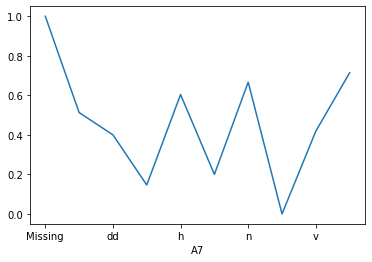

In [64]:
X_train_enc.groupby(["A7"])["A16"].mean().plot()

In [69]:
ordered_labels = X_train_enc.groupby(["A7"])["A16"].mean().sort_values().index
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'o': 0,
 'ff': 1,
 'j': 2,
 'dd': 3,
 'v': 4,
 'bb': 5,
 'h': 6,
 'n': 7,
 'z': 8,
 'Missing': 9}

<AxesSubplot:xlabel='A7'>

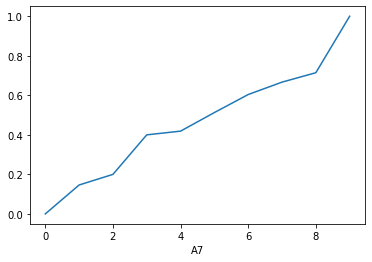

In [71]:
X_test_enc = X_test.copy()

X_train_enc["A7"] = X_train_enc["A7"].map(ordinal_mapping)
X_test_enc["A7"] = X_test_enc["A7"].map(ordinal_mapping)
X_train_enc.groupby(["A7"])["A16"].mean().plot()

In [72]:
# lets use the Ordinal Encoder
oe_enc = OrdinalEncoder(encoding_method="ordered", variables=None)  # get all categorical vars
oe_enc.fit(X_train, y_train)

OrdinalEncoder()

In [74]:
X_train_enc = oe_enc.transform(X_train)
X_test_enc = oe_enc.transform(X_test)
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,1,46.08,3.000,1,1,7,4,2.375,1,1,8,0,1,396.0,4159
303,1,15.92,2.875,1,1,10,4,0.085,0,0,0,1,1,120.0,0
204,0,36.33,2.125,0,0,8,4,0.085,1,1,1,1,1,50.0,1187
351,0,22.17,0.585,0,0,0,1,0.000,0,0,0,1,1,100.0,0
118,0,57.83,7.040,1,1,5,4,14.000,1,1,6,0,1,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,36.75,4.710,1,1,0,1,0.000,0,0,0,1,1,160.0,0
192,0,41.75,0.960,1,1,12,4,2.500,1,0,0,1,1,510.0,600
629,1,19.58,0.665,1,1,8,4,1.665,0,0,0,1,1,220.0,5
559,1,22.83,2.290,1,1,10,6,2.290,1,1,7,0,1,140.0,2384


### Encoding with the mean of the target

Very similar to what was done before, but here we don't use the integers indicating the order. Instead, we use the actual value of the mean.

In [75]:
from feature_engine.encoding import MeanEncoder

In [76]:
m_enc = MeanEncoder(variables=None)
m_enc.fit(X_train, y_train)

MeanEncoder()

In [77]:
X_train_enc = m_enc.transform(X_train)
X_test_enc = m_enc.transform(X_test)
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.472222,46.08,3.000,0.512397,0.512397,0.451613,0.418773,2.375,0.785156,0.702830,8,0.445455,0.464853,396.0,4159
303,0.472222,15.92,2.875,0.512397,0.512397,0.625000,0.418773,0.085,0.070485,0.250923,0,0.452471,0.464853,120.0,0
204,0.438806,36.33,2.125,0.226087,0.226087,0.500000,0.418773,0.085,0.785156,0.702830,1,0.452471,0.464853,50.0,1187
351,0.438806,22.17,0.585,0.226087,0.226087,0.105263,0.146341,0.000,0.070485,0.250923,0,0.452471,0.464853,100.0,0
118,0.438806,57.83,7.040,0.512397,0.512397,0.423077,0.418773,14.000,0.785156,0.702830,6,0.445455,0.464853,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.472222,36.75,4.710,0.512397,0.512397,0.105263,0.146341,0.000,0.070485,0.250923,0,0.452471,0.464853,160.0,0
192,0.438806,41.75,0.960,0.512397,0.512397,0.791667,0.418773,2.500,0.785156,0.250923,0,0.452471,0.464853,510.0,600
629,0.472222,19.58,0.665,0.512397,0.512397,0.500000,0.418773,1.665,0.070485,0.250923,0,0.452471,0.464853,220.0,5
559,0.472222,22.83,2.290,0.512397,0.512397,0.625000,0.603960,2.290,0.785156,0.702830,7,0.445455,0.464853,140.0,2384


At the end, we also have a monotonic relationship.

In [79]:
# with pandas
X_train.groupby(["A7"])["A15"].mean().to_dict()

{'Missing': 0.0,
 'bb': 2455.051282051282,
 'dd': 582.0,
 'ff': 536.8536585365854,
 'h': 650.4653465346535,
 'j': 212.0,
 'n': 253.66666666666666,
 'o': 120.0,
 'v': 952.0974729241877,
 'z': 2094.714285714286}

### Encoding with the Weight of Evidence

THe WoE was developed primarily for credit and financial industries to facilitate variable screening and exploratory analysis and to **build more predictive linear models to evaluate the risk of loan default**.

The WoE is computed from the basic odds ratio:

$$
WoE = log\frac{p(Y=1)}{p(Y=0)}
$$

In [80]:
from feature_engine.encoding import WoEEncoder

In [82]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
X_train_enc["A16"] = y_train

In [86]:
p1 = X_train_enc.groupby(["A1"])["A16"].mean()
p0 = 1 - p1

In [87]:
# lets create a dictionary with the woE per category
woe = dict(np.log(p1 / p0))
woe

{'Missing': 0.0, 'a': -0.11122563511022437, 'b': -0.24600937605121306}

In [89]:
# lets replace the category by the woe values
X_train_enc["A1"] = X_train_enc["A1"].replace(woe)
X_test_enc["A1"] = X_test_enc["A1"].replace(woe)

In [90]:
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
596,-0.111226,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159,1
303,-0.111226,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0,0
204,-0.246009,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187,1
351,-0.246009,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0,0
118,-0.246009,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-0.111226,36.75,4.710,u,g,ff,ff,0.000,f,f,0,f,g,160.0,0,0
192,-0.246009,41.75,0.960,u,g,x,v,2.500,t,f,0,f,g,510.0,600,1
629,-0.111226,19.58,0.665,u,g,w,v,1.665,f,f,0,f,g,220.0,5,0
559,-0.111226,22.83,2.290,u,g,q,h,2.290,t,t,7,t,g,140.0,2384,1


In [92]:
# using WoEEncoder
woe_encoder = WoEEncoder(variables=["A1", "A10", "A12"])
woe_encoder.fit(X_train, y_train)

WoEEncoder(variables=['A1', 'A10', 'A12'])

In [93]:
woe_encoder.encoder_dict_

{'A1': {'Missing': 0.20359895524123955,
  'a': 0.09237332013101507,
  'b': -0.04241042080997339},
 'A10': {'f': -0.8900993186244411, 't': 1.064410534795166},
 'A12': {'f': 0.012909148776768313, 't': -0.015454610821445114}}

In [94]:
W_train_enc = woe_encoder.transform(X_train)
W_test_enc = woe_encoder.transform(X_test)
W_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.092373,46.08,3.000,u,g,c,v,2.375,t,1.064411,8,-0.015455,g,396.0,4159
303,0.092373,15.92,2.875,u,g,q,v,0.085,f,-0.890099,0,0.012909,g,120.0,0
204,-0.042410,36.33,2.125,y,p,w,v,0.085,t,1.064411,1,0.012909,g,50.0,1187
351,-0.042410,22.17,0.585,y,p,ff,ff,0.000,f,-0.890099,0,0.012909,g,100.0,0
118,-0.042410,57.83,7.040,u,g,m,v,14.000,t,1.064411,6,-0.015455,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.092373,36.75,4.710,u,g,ff,ff,0.000,f,-0.890099,0,0.012909,g,160.0,0
192,-0.042410,41.75,0.960,u,g,x,v,2.500,t,-0.890099,0,0.012909,g,510.0,600
629,0.092373,19.58,0.665,u,g,w,v,1.665,f,-0.890099,0,0.012909,g,220.0,5
559,0.092373,22.83,2.290,u,g,q,h,2.290,t,1.064411,7,-0.015455,g,140.0,2384


### Grouping Rare or Infrequent Categories

Rare values are those categories that are present only in a small percentage of the observations. Normally any value below 5% can be considered rare. We can avoid problems with categories that are present just on training or testing sets by grouping those infrequent categories into the same bucket, like **Rare** or **Others**.

In [95]:
from feature_engine.encoding import RareLabelEncoder

In [96]:
# using pandas we'll make a function
def get_frequent_categories(df, variable, tolerance):
    temp = df[variable].value_counts() / len(df)
    frequent = [x for x in temp.loc[temp > tolerance].index.values]
    return frequent

In [97]:
frequent_vars = get_frequent_categories(X_train, "A7", 0.05)
frequent_vars

['v', 'h', 'ff', 'bb']

In [98]:
# using numpy to replace infrequent variables with 'Rare' 
np.where(X_train["A7"].isin(frequent_vars), X_train["A7"], "Rare")

array(['v', 'v', 'v', 'ff', 'v', 'h', 'v', 'Rare', 'v', 'Rare', 'v', 'v',
       'h', 'v', 'v', 'v', 'v', 'v', 'Rare', 'v', 'v', 'h', 'bb', 'v',
       'ff', 'h', 'Rare', 'bb', 'bb', 'v', 'h', 'v', 'v', 'v', 'h', 'bb',
       'ff', 'ff', 'v', 'Rare', 'h', 'v', 'v', 'v', 'v', 'h', 'v', 'v',
       'Rare', 'ff', 'v', 'v', 'h', 'bb', 'Rare', 'v', 'v', 'v', 'v', 'v',
       'v', 'v', 'h', 'v', 'v', 'v', 'h', 'v', 'v', 'h', 'h', 'v', 'v',
       'v', 'v', 'bb', 'v', 'v', 'v', 'h', 'bb', 'v', 'v', 'v', 'v', 'bb',
       'h', 'v', 'v', 'bb', 'v', 'ff', 'v', 'h', 'Rare', 'v', 'v', 'v',
       'v', 'v', 'bb', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'Rare',
       'bb', 'h', 'v', 'v', 'h', 'v', 'v', 'bb', 'h', 'v', 'ff', 'v', 'v',
       'v', 'v', 'Rare', 'v', 'ff', 'v', 'v', 'v', 'v', 'h', 'v', 'v',
       'v', 'h', 'ff', 'v', 'v', 'v', 'h', 'v', 'h', 'v', 'h', 'ff', 'h',
       'h', 'v', 'bb', 'v', 'v', 'v', 'h', 'v', 'v', 'v', 'ff', 'v', 'h',
       'v', 'h', 'v', 'v', 'v', 'v', 'v', 'ff', 'v

In [99]:
# using the rare encoder
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)  # will just look at variables with at least 5 categories, otherwise will consider frequent labels
rare_encoder.fit(X_train)

/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable A1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable A4 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable A5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/feature_engine/encoding/rare_la

RareLabelEncoder(n_categories=4)

In [100]:
X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)
X_train_enc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,ff,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,Rare,v,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,v,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,h,2.290,t,t,7,t,g,140.0,2384


### Binary Encoding

Encode variable just as binary code. It is different than one-hot encoding because here we use less variables than in one-hot. The proportion is that you will need log2(n_labels) variables to represent you original variable.

In [104]:
# looks like as:
binary_representation = {
    "blue": [1, 0], 
    "green": [0, 1], 
    "red": [1, 1], 
    "violet": [0, 0]
}

As you increase the number of labels, you'll need a higher number of variables to represent that, normally following this relation: log2(n_labels). As this technique lack human interpretability, your use in organizations is questionable.

In [105]:
from category_encoders import BinaryEncoder

In [106]:
X_train["A7"].unique()

array(['v', 'ff', 'h', 'dd', 'z', 'bb', 'j', 'Missing', 'n', 'o'],
      dtype=object)

In [107]:
encoder = BinaryEncoder(cols=["A7"], drop_invariant=True)
encoder.fit(X_train)

BinaryEncoder(cols=['A7'], drop_invariant=True)

In [108]:
X_train_enc = encoder.transform(X_train)

In [109]:
X_train_enc

,A1,A2,A3,A4,A5,A6,A7_0,A7_1,A7_2,A7_3,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,0,0,0,1,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,0,0,0,1,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,0,0,0,1,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,0,0,1,0,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,0,0,0,1,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,0,0,1,0,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,x,0,0,0,1,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,0,0,0,1,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,0,0,1,1,2.290,t,t,7,t,g,140.0,2384


In [111]:
np.log2(9)

3.169925001442312

This is a useful feature for linear models, the main downside is the lack of interpretability.

### Performing Feature Hashing

With feature hashing, the categories of a variable are converted into a series of binary vectors using a hashing function. 

In [112]:
from category_encoders import HashingEncoder

In [114]:
h_encoder = HashingEncoder(cols=["A7"], n_components=4)
h_encoder.fit(X_train)


HashingEncoder(cols=['A7'], max_process=6, max_sample=80, n_components=4)

In [115]:
X_train_enc = h_encoder.transform(X_train)
X_test_enc = h_encoder.transform(X_test)
X_train_enc

,col_0,col_1,col_2,col_3,A1,A2,A3,A4,A5,A6,A8,A9,A10,A11,A12,A13,A14,A15
596,0,0,1,0,a,46.08,3.000,u,g,c,2.375,t,t,8,t,g,396.0,4159
303,0,0,1,0,a,15.92,2.875,u,g,q,0.085,f,f,0,f,g,120.0,0
204,0,0,1,0,b,36.33,2.125,y,p,w,0.085,t,t,1,f,g,50.0,1187
351,0,1,0,0,b,22.17,0.585,y,p,ff,0.000,f,f,0,f,g,100.0,0
118,0,0,1,0,b,57.83,7.040,u,g,m,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,1,0,0,a,36.75,4.710,u,g,ff,0.000,f,f,0,f,g,160.0,0
192,0,0,1,0,b,41.75,0.960,u,g,x,2.500,t,f,0,f,g,510.0,600
629,0,0,1,0,a,19.58,0.665,u,g,w,1.665,f,f,0,f,g,220.0,5
559,0,1,0,0,a,22.83,2.290,u,g,q,2.290,t,t,7,t,g,140.0,2384


a